## Part 1 - Grouping slangs into mono- and polysemous

In [1]:
import pandas as pd
import numpy as np
import random

In [16]:
all_slangs = pd.read_csv("data/filtered_featured_slang_words.csv")
old_slang_list = pd.read_csv("slang_words_100.csv")
old_slang_list = old_slang_list.loc[:,"selected_words"]

In [8]:
all_slangs.shape

(2644, 2)

In [22]:
old_slang_list = list(old_slang_list)
old_slang_list

['whadja',
 'gotsta',
 'pecker',
 'sport',
 'rehab',
 'bumfuck',
 'YooKay',
 'dafuq',
 'bowl',
 'bromance',
 'gnarly',
 'pregos',
 'threads',
 'rehab',
 'God',
 'gunt',
 'spam',
 'KMT',
 'hells',
 'F2F',
 'crappy',
 'dis',
 'rachet',
 'jill',
 'blowjob',
 'tweeker',
 'tool',
 'walkie',
 'booty',
 'spec',
 'gag',
 'duckface',
 'rad',
 'revert',
 'compy',
 'locks',
 'next-level',
 'okee-doke',
 'whooty',
 'shtick',
 'TBA',
 'Bible-thumping',
 'skeeter',
 'crock',
 'tl;dr',
 'lame-o',
 'zooted',
 'DFTBA',
 'twit',
 'ent',
 'horribad',
 'slack-jawed',
 'gansta',
 'money',
 'carny',
 'spec',
 'a-list',
 'kosher',
 'SCNR',
 'motherfucking',
 'crossfade',
 'grub',
 'gridlock',
 'trisexual',
 'sesh',
 'AWOL',
 'freckle',
 'wut',
 'zounds',
 'sicc',
 'spec-ops',
 'fire',
 'bodice-ripper',
 'BFFL',
 'WOYM',
 'gayborhood',
 'shiesty',
 'shiznat',
 'lemme',
 'GLHF',
 'sis',
 'fap',
 'bomb',
 'thirsty',
 'streak',
 'workaround',
 'conniption',
 'soused',
 'CBA',
 'styling',
 'IBT',
 'mozzie',
 'gru

In [19]:
## new_slangs = []
## slang_homonyms = []
## deleted_words = []

In [141]:
## new_slangs.append(old_slang_list.pop())
## slang_homonyms.append(old_slang_list.pop())
## deleted_words.append(old_slang_list.pop())
## print(old_slang_list[-2:])

[]


In [145]:
len(new_slangs), len(slang_homonyms), len(deleted_words)

(46, 34, 16)

In [147]:
pd.DataFrame(new_slangs).to_csv("word-lists/monosemous_slangs.csv")
pd.DataFrame(slang_homonyms).to_csv("word-lists/polysemous_slangs.csv")
pd.DataFrame(deleted_words).to_csv("word-lists/deleted_words.csv")

## Part 2 - Sampling new slangs

In [18]:
mono_slangs = pd.read_csv("word-lists/monosemous_slangs.csv")
poly_slangs = pd.read_csv("word-lists/polysemous_slangs.csv")
all_slangs = pd.read_csv("word-lists/filtered_featured_slang_words.csv")
print(len(mono_slangs), len(poly_slangs), len(all_slangs))

46 34 2644


In [19]:
mono_slangs = list(mono_slangs.iloc[:,1])
poly_slangs = list(poly_slangs.iloc[:,1])
all_slangs = list(all_slangs.iloc[:,1])

#### Pipeline
* Sample slang from all slangs
* If slang is abbreviation or multiword expression or exists in slang lists, continue
* Elif slang is in MW with a different definition than in OSD (as is or stemmed version) and is not labeled informal or slang, add to poly_slangs
* Else, add to monoslangs

Note: slangs with multiple slang meanings but no non-slang meanings are put in the mono category

In [469]:
slang = random.sample(all_slangs, 1)[0]
print(slang)
print(slang in mono_slangs)
print(slang in poly_slangs)

down
False
False


In [470]:
#mono_slangs.append(slang)
poly_slangs.append(slang)
#mono_slangs.append("bupkis")
#poly_slangs.append("beef")
print(len(mono_slangs), len(poly_slangs))

100 100


In [471]:
pd.DataFrame(mono_slangs).to_csv("word-lists/100_monosemous_slangs.csv")
pd.DataFrame(poly_slangs).to_csv("word-lists/100_polysemous_slangs.csv")

## Compare frequency distributions

In [1]:
import wordfreq
import matplotlib.pyplot as plt

In [4]:
wordfreq.word_frequency("bling", lang='en', wordlist='best', minimum=0.0)

1.62e-06

In [490]:
nonslangs = pd.read_csv("word-lists/nonslang_words_100.csv")
nonslangs = list(nonslangs.iloc[:,2])

In [477]:
mono_freqs = []
for word in mono_slangs:
    mono_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))
poly_freqs = []
for word in poly_slangs:
    poly_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))
nonslang_freqs = []
for word in nonslangs:
    nonslang_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))

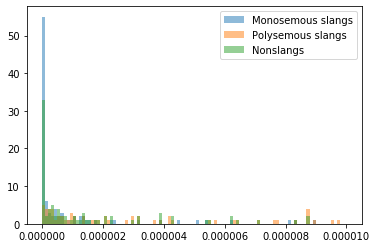

In [499]:
bins = np.linspace(0, 0.00001, 100)
plt.hist(mono_freqs, bins, alpha=0.5, label='Monosemous slangs')
plt.hist(poly_freqs, bins, alpha=0.5, label='Polysemous slangs')
plt.hist(nonslang_freqs, bins, alpha=0.5, label='Nonslangs')
plt.legend(loc='upper right')
plt.show()

In [505]:
print(sum(np.array(nonslang_freqs) >= 0.00001))
print(sum(np.array(poly_freqs) >= 0.00001))

12
38


# Compare frequency distributions between random slang and non-slangs
Two parts:
* Random non-slangs with slangs of only one meaning
* Random non-slangs with random slangs (i.e. mono- and polysemous)

In [11]:
import wordfreq
import matplotlib.pyplot as plt
# sample a list of 100 non-slang words uniformly at random
random.seed(58)
word_dict = wordfreq.get_frequency_dict('en', wordlist='best')
all_words = list(word_dict.keys())
sampled_nonslangs = random.sample(all_words, 100)
nonslang_freqs = []
for word in sampled_nonslangs:
    nonslang_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))

In [14]:
# Compare to slangs of only one meaning

monosemous_slangs = pd.read_csv("word-lists/100_monosemous_slangs.csv")
monosemous_slangs = list(monosemous_slangs.iloc[:,1])
mono_freqs = []
for word in monosemous_slangs:
    mono_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))

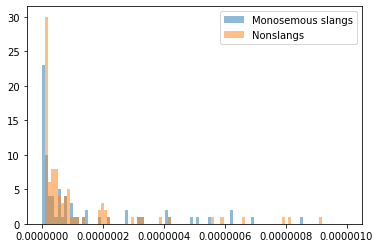

In [23]:
bins = np.linspace(0, 0.000001, 100)
plt.hist(mono_freqs, bins, alpha=0.5, label='Monosemous slangs')
plt.hist(nonslang_freqs, bins, alpha=0.5, label='Nonslangs')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Compare to slangs of one and multiple meanings
random.seed(58)
all_slangs = pd.read_csv("word-lists/filtered_featured_slang_words.csv")
all_slangs = list(all_slangs.iloc[:,1])
sampled_slangs = random.sample(all_slangs, 100)
slang_freqs = []
for word in sampled_slangs:
    slang_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))

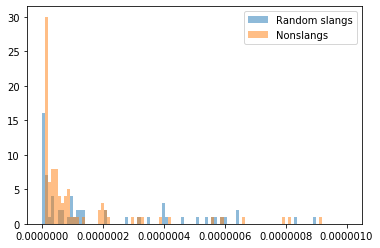

In [26]:
bins = np.linspace(0, 0.000001, 100)
plt.hist(slang_freqs, bins, alpha=0.5, label='Random slangs')
plt.hist(nonslang_freqs, bins, alpha=0.5, label='Nonslangs')
plt.legend(loc='upper right')
plt.show()

In [27]:
sampled_nonslangs

['shatterstar',
 'lestrange',
 'balalaika',
 'crj',
 'firmware',
 'gses',
 "kind've",
 'cumorah',
 "crash's",
 'fourfourtwo',
 "trigger's",
 'mondy',
 'stracey',
 'coercively',
 'preconditioner',
 'asim',
 'lifting',
 'forry',
 'cini',
 '時',
 'controversially',
 'zalm',
 '1cr',
 'gigue',
 'hounsfield',
 'bellies',
 'bogeyman',
 "trevor's",
 'ethnocultural',
 'horton',
 'pawed',
 'underpayments',
 'kusal',
 'substantia',
 'unsd',
 "alda's",
 'browny',
 "porter's",
 'warde',
 'frats',
 'entertaiment',
 'phantasm',
 'verner',
 'pecks',
 'minigun',
 'spectral',
 'temporalities',
 'randolf',
 'reestablished',
 'kinzler',
 'blefuscu',
 'vigoro',
 'patsies',
 'nagan',
 'ftu',
 'dagestanis',
 'blackaby',
 'resourcing',
 'niclas',
 'villefort',
 'seabee',
 'rosenworcel',
 'cording',
 'obongo',
 'propria',
 'gotoku',
 'vespa',
 'darwen',
 'castiel',
 'sensai',
 'disproof',
 'cnidaria',
 'antidoping',
 'reedbuck',
 'pluggable',
 'châtel',
 'normalise',
 'juanita',
 'rater',
 'circulate',
 'radiop

## Sample 100 nonslang words

In [28]:
random.seed(77)
word_dict = wordfreq.get_frequency_dict('en', wordlist='best')
all_words = list(word_dict.keys())
hundred_nonslangs = random.sample(all_words, 100)
hundred_nonslangs

['intimidator',
 'kω',
 'moliere',
 "ezekiel's",
 'pritam',
 'fiddled',
 'miyama',
 'baloyi',
 'ngx',
 'starsailor',
 'galavant',
 'humblest',
 'gevisser',
 'asmodee',
 'awesome',
 'wuk',
 'porto',
 'liuzzo',
 'bernards',
 'steadicam',
 'bicolour',
 'senryu',
 'trampolining',
 'uria',
 'hamoud',
 'allgemeine',
 'moyer',
 'nusser',
 'underated',
 'bral',
 'wellfield',
 "sbs's",
 'thit',
 'anticlockwise',
 'jute',
 'mercier',
 "scheme's",
 'uncosted',
 'guadaloupe',
 'rafiel',
 'studsvik',
 'grisly',
 'alanine',
 'notas',
 'dunas',
 'butane',
 'postural',
 'eremita',
 'lothringen',
 'terrifies',
 'reedbed',
 'moldovan',
 'legalist',
 'pantsu',
 'sección',
 'banzai',
 'rehabilitations',
 'kyum',
 's.h.i.e.l.d',
 "weirdo's",
 'ajegunle',
 'bazouks',
 'pepy',
 'scallywag',
 'heslop',
 'pemigewasset',
 'hinke',
 "pennington's",
 "dom's",
 'unutilized',
 'echo',
 'heaviest',
 'rump',
 'flinstone',
 'decomposition',
 'doubleheaders',
 'kinnaur',
 'jugglers',
 'mackellar',
 "mushroom's",
 "fazb

In [428]:
word = random.sample(all_words, 1)[0]
print(word)

upgrade


In [429]:
complete_nonslangs.append(word)
print(complete_nonslangs[-3:])
print(len(complete_nonslangs))

['copyediting', 'adulterous', 'upgrade']
100


In [430]:
complete_nonslangs

['agenda',
 'weimaraner',
 'lawlessness',
 'chug',
 'nonskid',
 'sympathizer',
 'despoil',
 'milepost',
 'vanadium',
 'competencies',
 'clinkstone',
 'mushroom',
 'jugglers',
 'doubleheader',
 'decomposition',
 'rump',
 'heaviest',
 'echo',
 'unutilized',
 'scallywag',
 'peppy',
 'shield',
 'rehabilitations',
 'banzai',
 'pantsuit',
 'legalist',
 'moldovan',
 'reedbed',
 'terrifies',
 'postural',
 'butane',
 'alanine',
 'grisly',
 'scheme',
 'jute',
 'anticlockwise',
 'underrated',
 'uria',
 'trampolining',
 'bicolour',
 'awesome',
 'humblest',
 'galavant',
 'sailor',
 'fiddled',
 'intimidator',
 'hemosiderin',
 'bright',
 'epilator',
 'sabertooth',
 'calorie',
 'conventionally',
 'telogen',
 'extravasated',
 'deathblow',
 'repentant',
 'bedchambers',
 'superabundance',
 'admitting',
 'dysthymic',
 'scummiest',
 'strap',
 'guardian',
 'shylock',
 'minmax',
 'glutton',
 'squall',
 'antipathies',
 'camara',
 'underpainting',
 'morphology',
 'subtended',
 'avoiders',
 'outlawing',
 'timbr

In [431]:
pd.DataFrame(complete_nonslangs).to_csv("word-lists/100_nonslangs.csv")

## Merging to one dataframe

In [432]:
slangs = pd.read_csv("word-lists/100_slangs.csv")
nonslangs = pd.read_csv("word-lists/100_nonslangs.csv")
hybrids = pd.read_csv("word-lists/100_hybrids.csv")

In [436]:
slangs["type"] = "slang"
nonslangs["type"] = "nonslang"
hybrids["type"] = "both"

In [444]:
all_words = pd.concat([slangs.iloc[:,1:], nonslangs.iloc[:,1:], hybrids.iloc[:,1:]])
all_words.columns = ["word", "type"]
all_words

,word,type
0,peeps,slang
1,compo,slang
2,hasbian,slang
3,mozzie,slang
4,soused,slang
...,...,...
95,sneak,both
96,ghost,both
97,hitter,both
98,smoked,both


In [445]:
wordfreqs = []
for word in all_words["word"]:
    wordfreqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))
all_words["wordfreq_freq"] = wordfreqs
all_words.head()

,word,type,wordfreq_freq
0,peeps,slang,1.260000e-06
1,compo,slang,2.140000e-07
2,hasbian,slang,0.000000e+00
3,mozzie,slang,7.080000e-08
4,soused,slang,5.370000e-08


In [459]:
all_words["is_saved"] = False

In [461]:
all_words.to_csv("word-lists/all_words_300.csv")

In [1]:
## word list
import pandas as pd
word_list = pd.read_csv("word-lists/all_words_300.csv")

In [5]:
word_list = word_list.loc[:,["word", "type", "wordfreq_freq", "is_saved"]]

In [17]:
import numpy as np
word_list = word_list.iloc[(word_list[["word"]] != "clinkstone").values,:]
word_list = word_list.iloc[(word_list[["word"]] != "camara").values,:]
word_list = word_list.iloc[(word_list[["word"]] != "minmax").values,:]
word_list = word_list.reset_index()

In [25]:
word_list.to_csv("word-lists/all_words_300.csv", index=False)

In [24]:
word_list

,word,type,wordfreq_freq,is_saved
0,peeps,slang,1.260000e-06,True
1,compo,slang,2.140000e-07,True
2,hasbian,slang,0.000000e+00,True
3,mozzie,slang,7.080000e-08,True
4,soused,slang,5.370000e-08,True
...,...,...,...,...
292,sneak,both,9.770000e-06,False
293,ghost,both,2.630000e-05,False
294,hitter,both,3.160000e-06,False
295,smoked,both,8.320000e-06,False


## Semantic change comparing slang and nonslang


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.evaluate import permutation_test
from causal_analysis import exact_mc_perm_test, my_permutation_test


all_words_df = pd.read_csv("word-lists/causal_data_input.csv")
slang_APD = list(all_words_df[all_words_df.type == "slang"].semantic_change)
nonslang_APD = list(all_words_df[all_words_df.type == "nonslang"].semantic_change)

p_value_mlxtend = permutation_test(slang_APD, nonslang_APD,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print("p val from mlxtend=",p_value_mlxtend)

p_value_mc_perm = exact_mc_perm_test(slang_APD, nonslang_APD, 10000)
print("p val from mc perm=", p_value_mc_perm)

p_value_my = my_permutation_test(slang_APD, nonslang_APD)
print("p val from my perm test=", p_value_my)

p val from mlxtend= 9.999000099990002e-05
p val from mc perm= 0.0
p val from my perm test= 0.0


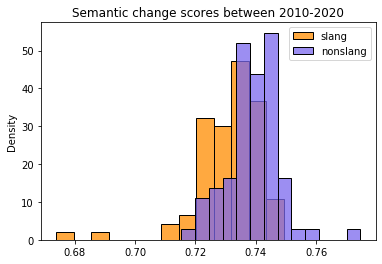

In [7]:
sns.histplot(slang_APD, color='darkorange', label='slang', stat="density")
sns.histplot(nonslang_APD, color='mediumslateblue', label='nonslang', stat="density")
plt.legend()
plt.title("Semantic change scores between 2010-2020")
plt.show()

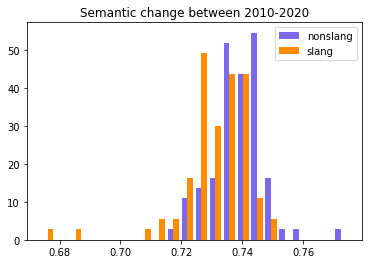

In [16]:
plt.hist([nonslang_APD,slang_APD], bins=22, color=['mediumslateblue','darkorange'],
         label=['nonslang', 'slang'], density=True)
plt.legend()
plt.title("Semantic change between 2010 and 2020")
plt.show()

In [18]:
import numpy as np
np.mean(slang_APD) - np.mean(nonslang_APD)

-0.008142606163104471

In [10]:
import numpy as np
print(np.nanmean(nonslang_APD), np.nanstd(nonslang_APD))
print(np.nanmean(slang_APD), np.nanstd(slang_APD))

0.7386702922325585 0.008840018767773579
0.732147424371743 0.008091576488230393


In [4]:
all_words_df.sort_values(by="combined_APD", ascending=False)[["word", "type","combined_APD"]][:10]

,word,type,combined_APD
134,anticlockwise,nonslang,0.774681
104,nonskid,nonslang,0.758204
107,milepost,nonslang,0.752336
300,inclusive,nonslang,0.751632
99,dogg,slang,0.749259
125,moldovan,nonslang,0.748866
132,scheme,nonslang,0.748462
11,shiesty,slang,0.748194
190,estimated,nonslang,0.748129
143,fiddled,nonslang,0.748078


In [5]:
all_words_df.sort_values(by="combined_APD", ascending=True)[["word", "type","combined_APD"]][:10]

,word,type,combined_APD
45,whadja,slang,0.673801
60,colitas,slang,0.687271
83,dudette,slang,0.710243
31,duckface,slang,0.713957
18,motherfucking,slang,0.715047
299,haircut,nonslang,0.715294
48,roshambo,slang,0.718454
79,blumpkin,slang,0.719326
71,dang,slang,0.720404
49,prettyful,slang,0.720808


In [9]:
from mlxtend.evaluate import permutation_test
test = all_words_df.sort_values(by="combined_APD", ascending=True)[["word", "type","combined_APD"]][2:]

slang_APD = list(test[test.type == "slang"].combined_APD)
nonslang_APD = list(test[test.type == "nonslang"].combined_APD)

p_value_mlxtend = permutation_test(slang_APD, nonslang_APD,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print("p val from mlxtend=",p_value_mlxtend)

p val from mlxtend= 9.999000099990002e-05


## Semantic change hybrid words

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.evaluate import permutation_test
from causal_analysis import exact_mc_perm_test, my_permutation_test
import numpy as np
import math


all_words_df = pd.read_csv("word-lists/all_words_300_change_scores2.csv")
causal_input_df = pd.read_csv("word-lists/causal_data_input.csv")
all_words_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,word,type,wordfreq_freq,is_saved,Euclidian_APD_x,cosine_APD_x,combined_APD_x,Euclidian_APD_y,cosine_APD_y,combined_APD_y
0,0,0,0,0,0,0,0,0,0,0,...,peeps,slang,1.260000e-06,True,151.212372,0.991023,0.732932,NaN,NaN,NaN
1,1,1,1,1,1,1,1,1,1,1,...,compo,slang,2.140000e-07,True,157.540543,0.999778,0.738720,NaN,NaN,NaN
2,2,2,2,2,2,2,2,2,2,2,...,hasbian,slang,0.000000e+00,True,147.584442,0.980109,0.724731,NaN,NaN,NaN
3,3,3,3,3,3,3,3,3,3,3,...,mozzie,slang,7.080000e-08,True,141.399841,0.976911,0.721521,NaN,NaN,NaN
4,4,4,4,4,4,4,4,4,4,4,...,soused,slang,5.370000e-08,True,154.876999,0.998371,0.739231,NaN,NaN,NaN


Hybrid:  0.7364810260979852 0.007408671696996918
Slang:  0.7308572515859442 0.011433193291124447
Nonslang:  0.7389998577490486 0.008820609560231528


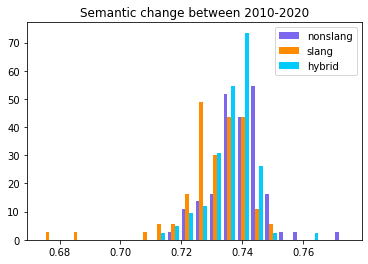

In [63]:
slang_APD = list(causal_input_df[causal_input_df.type == "slang"].semantic_change)
nonslang_APD = list(causal_input_df[causal_input_df.type == "nonslang"].semantic_change)
hybrid_APD = list(all_words_df[all_words_df.type == "both"].combined_APD_y)
hybrid_APD = [value for value in hybrid_APD if not math.isnan(value)]

print("Hybrid: ", np.mean(hybrid_APD), np.std(hybrid_APD))
print("Slang: ", np.mean(slang_APD), np.std(slang_APD))
print("Nonslang: ", np.mean(nonslang_APD), np.std(nonslang_APD))

plt.hist([nonslang_APD,slang_APD,hybrid_APD], bins=22, color=['mediumslateblue','darkorange','xkcd:bright sky blue'],
         label=['nonslang', 'slang','hybrid'], density=True)
plt.legend()
plt.title("Semantic change between 2010-2020")
plt.savefig("change_scores_hybrid.png", format="png")
plt.show()

In [54]:
p_value_mlxtend = permutation_test(hybrid_APD, nonslang_APD,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print("Hybrid and nonslang p val from mlxtend=",p_value_mlxtend)

p_value_mlxtend = permutation_test(hybrid_APD, slang_APD,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print("Hybrid and slang p val from mlxtend=",p_value_mlxtend)

p_value_mlxtend = permutation_test(nonslang_APD, slang_APD,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print("Slang and nonslang p val from mlxtend=",p_value_mlxtend)

Hybrid and nonslang p val from mlxtend= 0.042195780421957804
Hybrid and slang p val from mlxtend= 0.00019998000199980003
Slang and nonslang p val from mlxtend= 9.999000099990002e-05


In [55]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(hybrid_APD, nonslang_APD)
print("Hybrid and nonslang p val from t test=",p, "\t t-stat=",stat)

stat, p = ttest_ind(hybrid_APD, slang_APD)
print("Hybrid and slang p val from t test=",p, "\t t-stat=",stat)

stat, p = ttest_ind(nonslang_APD, slang_APD)
print("Slang and nonslang p val from t test=",p, "\t t-stat=",stat)

Hybrid and nonslang p val from t test= 0.044609028783673725 	 t-stat= -2.023296500097746
Hybrid and slang p val from t test= 0.0001658927079272045 	 t-stat= 3.8517741255895324
Slang and nonslang p val from t test= 1.430780477748986e-06 	 t-stat= 5.011895547679865


In [58]:
len(hybrid_APD)

92

## Tweet stats

In [64]:
from os import listdir
from os.path import isfile, join

old_slang_path = "data/tweets_old/slang_word_tweets"
new_slang_path = "data/tweets_new/slang_word_tweets"
old_nonslang_path = "data/tweets_old/nonslang_word_tweets"
new_nonslang_path = "data/tweets_new/nonslang_word_tweets"

old_slangs = [f for f in listdir(old_slang_path) if isfile(join(old_slang_path, f))]
new_slangs = [f for f in listdir(new_slang_path) if isfile(join(new_slang_path, f))]
old_nonslangs = [f for f in listdir(old_nonslang_path) if isfile(join(old_nonslang_path, f))]
new_nonslangs = [f for f in listdir(new_nonslang_path) if isfile(join(new_nonslang_path, f))]

In [67]:
old_slang_counts = []
for file in old_slangs:
    old_slang_counts.append(pd.read_csv(join(old_slang_path,file)).shape[0])
    
new_slang_counts = []
for file in new_slangs:
    new_slang_counts.append(pd.read_csv(join(new_slang_path,file)).shape[0])

old_nonslang_counts = []
for file in old_nonslangs:
    old_nonslang_counts.append(pd.read_csv(join(old_nonslang_path,file)).shape[0])

new_nonslang_counts = []
for file in new_nonslangs:
    new_nonslang_counts.append(pd.read_csv(join(new_nonslang_path,file)).shape[0])

In [69]:
import numpy as np

print("Old slang mean:", np.mean(old_slang_counts))
print("New slang mean:", np.mean(new_slang_counts))
print("Old nonslang mean:", np.mean(old_nonslang_counts))
print("New nonslang mean:", np.mean(new_nonslang_counts))

print("Total:", sum(old_slang_counts)+sum(new_slang_counts)+sum(old_nonslang_counts)+sum(new_nonslang_counts))

Old slang mean: 370.05806451612904
New slang mean: 332.53846153846155
Old nonslang mean: 322.79245283018867
New nonslang mean: 254.13333333333333
Total: 170135


## Create csv file for causality input

In [64]:
word_change_scores = pd.read_csv("word-lists/all_words_300_change_scores.csv")
slang_polysemy = pd.read_csv("word-lists/polysemy_slang.csv")
nonslang_polysemy = pd.read_csv("word-lists/polysemy_nonslang.csv")
slang_freq = pd.read_csv("data/frequencies/slang_all_freqs.csv")
nonslang_freq = pd.read_csv("data/frequencies/nonslang_all_freqs.csv")

word_polysemy = pd.concat([slang_polysemy, nonslang_polysemy])
word_freq = pd.concat([slang_freq, nonslang_freq])
word_change_scores = word_change_scores[["word", "type", "combined_APD"]]

word_polysemy = word_polysemy[["word","polysemy"]]
word_freq = word_freq[["word", "freq2010", "freq2020_norm_6.4"]]

In [65]:
words_complete = word_polysemy.merge(word_freq, left_on="word", right_on="word", how="outer").merge(word_change_scores,
                                                                                  left_on="word", right_on="word",
                                                                                  how="outer")

In [66]:
words_complete = words_complete.loc[words_complete["type"] != "both",:][["word", "polysemy", "freq2010",
                                                                       "freq2020_norm_6.4", "type", "combined_APD"]]
words_complete.columns = ["word", "polysemy", "freq2010", "freq2020", "type", "semantic_change"]
words_complete = words_complete.reset_index(drop=True)

In [67]:
words_complete.to_csv("data/causal_data_input.csv", index=False)